In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time']= pd.to_datetime(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [ ]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

In [ ]:
df

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10
...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50


In [ ]:
df.describe()

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,32.433825,18.414002,14.316892,87.846242,47.084925,68.994602,269.090489
std,36.211287,27.666459,15.064466,94.951663,71.422794,113.328362,180.713964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.130000
25%,7.000000,11.400000,3.690000,35.800000,13.600000,5.500000,151.377500
50%,14.100000,13.600000,6.500000,79.600000,21.500000,12.300000,208.180000
75%,56.800000,20.100000,22.500000,103.000000,51.600000,89.000000,336.000000
max,793.000000,980.000000,132.000000,971.000000,1641.000000,1120.000000,2037.000000


In [ ]:
df['Year'] = df['Time'].dt.year
df['Month']=df['Time'].dt.month
df['Quarter_of_year']=df['Time'].dt.quarter
df['Day_of_week']=df['Time'].dt.day_of_week
df['Week_of_year']=df['Time'].dt.week
df['Day']=df['Time'].dt.day
df['Hour']=df['Time'].dt.hour

df.drop('Time', inplace=True, axis=1)

In [ ]:
df

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Year,Month,Quarter_of_year,Day_of_week,Week_of_year,Day,Hour
0,27.4,41.8,53.7,89.6,18.60,498.0,729.10,2017,1,1,1,1,3,13
1,21.6,37.5,50.9,64.6,61.90,500.0,736.50,2017,1,1,1,1,3,14
2,18.5,37.4,60.1,64.2,16.50,480.0,676.70,2017,1,1,1,1,3,15
3,29.7,38.0,52.6,43.2,19.80,390.0,573.30,2017,1,1,1,1,3,16
4,16.7,38.1,56.7,42.4,15.20,373.0,542.10,2017,1,1,1,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,59.3,17.9,16.6,115.0,12.70,344.0,565.50,2022,1,1,0,1,3,8
43820,71.9,20.6,33.1,149.0,11.90,399.0,685.50,2022,1,1,0,1,3,9
43821,90.5,30.9,47.8,157.0,12.90,397.0,736.10,2022,1,1,0,1,3,10
43822,94.0,33.9,52.2,155.0,15.40,345.0,695.50,2022,1,1,0,1,3,11


In [ ]:
df1_train = df.loc[(df['Year'].isin([2017,2018]))]
 
##################################################################
 
df1_test = df.loc[(df['Year'].isin([2019]))]  # general model
 
df2_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([6,7,8,9]))]  # summer
 
df3_test = df.loc[(df['Year'].isin([2019]))&(df['Month'].isin([12,1,2,3]))]  # winter
 
df4_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([1,2,3,4,5,6,7,8]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # early morning 1am to 8 am
 
df5_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([9,10,11,12,13,14,15,16,17,18,19]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  # working hours 9am to 7pm
 
df6_test = df.loc[(df['Year'].isin([2019]))&(df['Hour'].isin([20,21,22,23,0]))&(df['Day_of_week'].isin([0,1,2,3,4]))]  #night hours 8 pm to 12 am
 
df7_test = df.loc[(df['Year'].isin([2019]))&(df['Day_of_week'].isin([5,6]))]  # weekend
 
 
print('df_train.shape: ', df1_train.shape)
print('df_test.shape: ', df1_test.shape)
 


df_train.shape:  (17459, 14)
df_test.shape:  (8760, 14)


In [ ]:
# conda install tensorflow

In [ ]:
df1_train

,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Year,Month,Quarter_of_year,Day_of_week,Week_of_year,Day,Hour
0,27.4,41.8,53.70,89.60,18.60,498.0,729.10,2017,1,1,1,1,3,13
1,21.6,37.5,50.90,64.60,61.90,500.0,736.50,2017,1,1,1,1,3,14
2,18.5,37.4,60.10,64.20,16.50,480.0,676.70,2017,1,1,1,1,3,15
3,29.7,38.0,52.60,43.20,19.80,390.0,573.30,2017,1,1,1,1,3,16
4,16.7,38.1,56.70,42.40,15.20,373.0,542.10,2017,1,1,1,1,3,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17454,0.0,11.7,7.50,11.60,8.69,250.0,289.49,2018,12,4,0,1,31,19
17455,0.0,10.9,9.38,10.50,8.75,234.0,273.53,2018,12,4,0,1,31,20
17456,0.0,12.0,8.06,7.50,10.40,233.0,270.96,2018,12,4,0,1,31,21
17457,0.0,10.3,6.75,9.63,10.90,234.0,271.58,2018,12,4,0,1,31,22


In [ ]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies  # without the dependencies if you already have TF/Numpy.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 3.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tcn import TCN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
X_train1 = df1_train[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_train1 = df1_train[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
X_test1 = df1_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df1_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape)

(17459, 8) (17459, 6) (8760, 8) (8760, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1=sc.fit_transform(X_test1)

In [ ]:
model = Sequential()
model.add(TCN(
      input_shape = (8,1),
      nb_filters=64,
      dilations=(1, 2, 4, 8, 16, 32),
      activation='relu',
      padding='causal',       
))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(500, input_dim=500, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(6))

model.summary()

model.compile(loss='mae', optimizer='adam')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn (TCN)                   (None, 64)                136256    
                                                                 
 dense (Dense)               (None, 500)               32500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 6)                 3006      
                                                                 
Total params: 923,262
Trainable params: 923,262
Non-trai

In [ ]:

model.fit(X_train1, y_train1, epochs=250, batch_size=32,validation_split=0.15,validation_data=None,verbose=1)

Epoch 1/250
464/464 [==============================] - 27s 16ms/step - loss: 14.5639 - val_loss: 26.1451
Epoch 2/250
464/464 [==============================] - 4s 9ms/step - loss: 10.5009 - val_loss: 25.6781
Epoch 3/250
464/464 [==============================] - 4s 9ms/step - loss: 9.9961 - val_loss: 24.2259
Epoch 4/250
464/464 [==============================] - 5s 10ms/step - loss: 9.7504 - val_loss: 25.7404
Epoch 5/250
464/464 [==============================] - 4s 9ms/step - loss: 9.3942 - val_loss: 24.8460
Epoch 6/250
464/464 [==============================] - 4s 9ms/step - loss: 9.0543 - val_loss: 28.3629
Epoch 7/250
464/464 [==============================] - 4s 9ms/step - loss: 8.9376 - val_loss: 25.4389
Epoch 8/250
464/464 [==============================] - 4s 9ms/step - loss: 8.7362 - val_loss: 25.1251
Epoch 9/250
464/464 [==============================] - 4s 9ms/step - loss: 8.6560 - val_loss: 27.1009
Epoch 10/250
464/464 [==============================] - 4s 9ms/step - loss: 8

In [ ]:
pred = model.predict(X_test1)


**GENERAL**

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

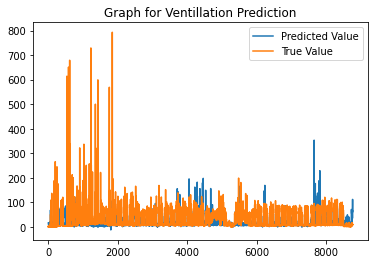

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  19.917712842741405

Root Mean Sqaured Error is:  36.9986299168471

R2 score is:  -0.003153759587766647


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

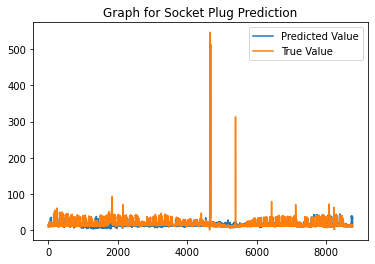

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.198205324039938

Root Mean Sqaured Error is:  12.086081565590796

R2 score is:  0.12588760313216052


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

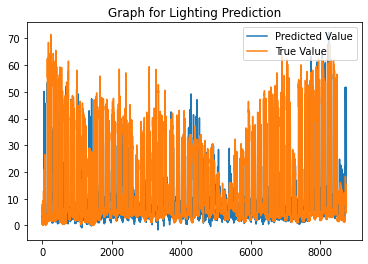

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.789992032283028

Root Mean Sqaured Error is:  10.989956727423182

R2 score is:  0.5181209364590215


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

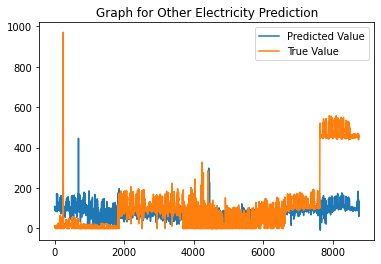

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  83.42697584979014

Root Mean Sqaured Error is:  139.47190952582943

R2 score is:  0.06614859691128583


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

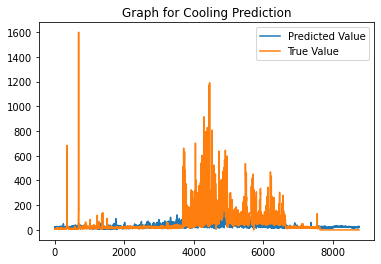

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  33.4945116580654

Root Mean Sqaured Error is:  69.40886962928408

R2 score is:  0.3425019204611781


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

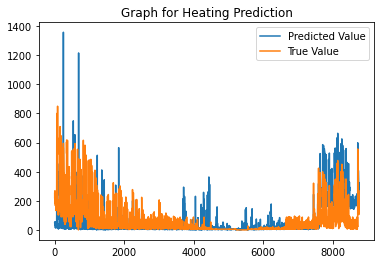

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  55.520080970828666

Root Mean Sqaured Error is:  97.9002866892904

R2 score is:  0.1479813021616171


**SUMMER**

In [ ]:
X_test1 = df2_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df2_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2928, 8) (2928, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

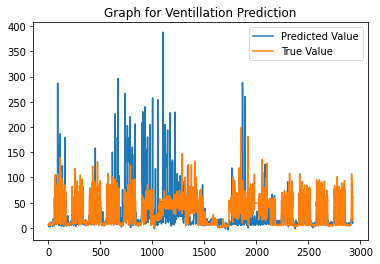

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  20.755164664532643

Root Mean Sqaured Error is:  34.83725978179515

R2 score is:  -0.7903903763491602


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

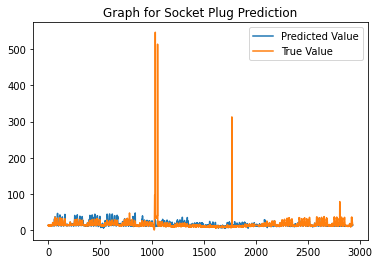

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.35551890884527

Root Mean Sqaured Error is:  16.768097299631325

R2 score is:  0.054380556939965574


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

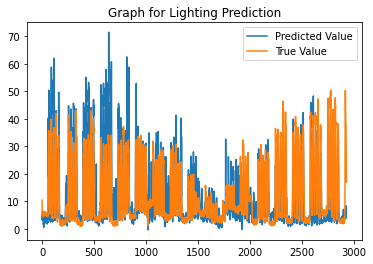

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.316048762270011

Root Mean Sqaured Error is:  8.795682275653318

R2 score is:  0.3722396782709081


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

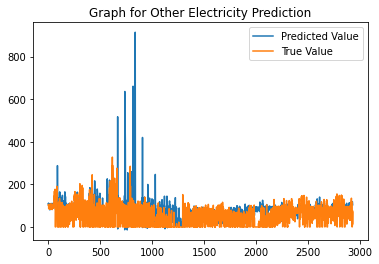

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  41.612357163193444

Root Mean Sqaured Error is:  62.4155044343249

R2 score is:  -0.9424559951321818


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

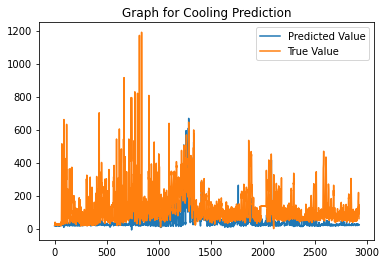

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  86.28023705645337

Root Mean Sqaured Error is:  128.90538969591634

R2 score is:  -0.377614497800121


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

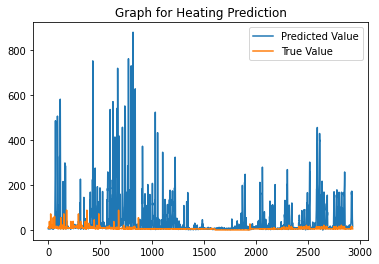

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  32.97966895460513

Root Mean Sqaured Error is:  81.54315486970727

R2 score is:  -211.36872276952533


**WINTER**

In [ ]:
X_test1 = df3_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df3_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2903, 8) (2903, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

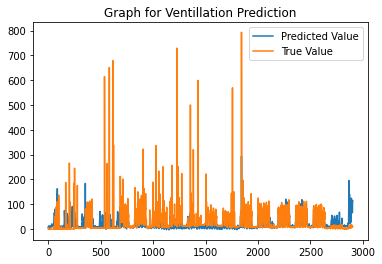

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  22.010771618031978

Root Mean Sqaured Error is:  47.97383445987343

R2 score is:  0.09810820297041911


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

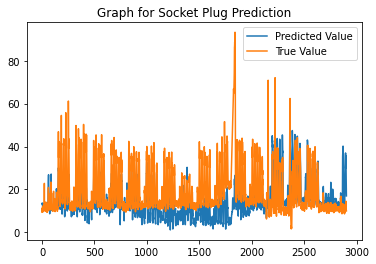

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  7.7452528480279454

Root Mean Sqaured Error is:  11.22709253266845

R2 score is:  -0.03891237698964822


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

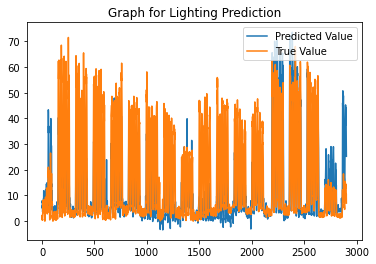

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  9.358076047385186

Root Mean Sqaured Error is:  14.160234981737037

R2 score is:  0.4027487916874918


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

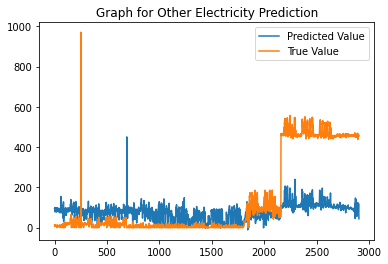

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  131.32824924760854

Root Mean Sqaured Error is:  187.9553421068696

R2 score is:  0.0960858418063073


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

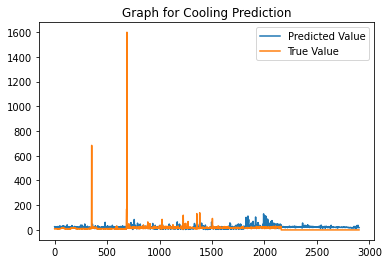

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  15.066817612702215

Root Mean Sqaured Error is:  37.21780241385518

R2 score is:  -0.16648424044814503


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

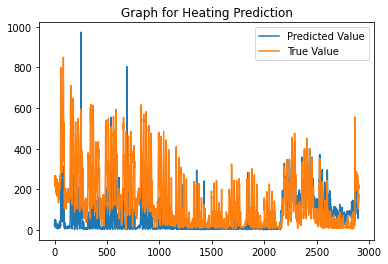

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  103.05875088320572

Root Mean Sqaured Error is:  145.5109637610988

R2 score is:  -0.01676692904933952


**Early Morning (1am to 8am)**

In [ ]:
X_test1 = df4_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df4_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2088, 8) (2088, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

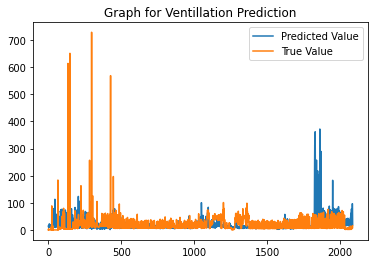

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  17.521166731365795

Root Mean Sqaured Error is:  42.515649662925284

R2 score is:  -0.3995581760739264


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

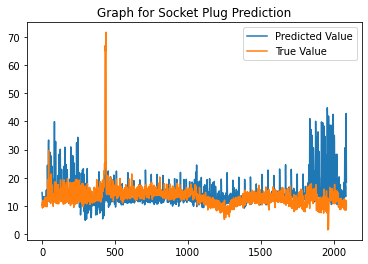

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  3.5566982807327507

Root Mean Sqaured Error is:  6.41194141786671

R2 score is:  -1.36546478891177


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

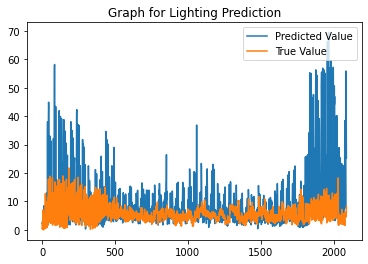

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  5.927345549319439

Root Mean Sqaured Error is:  11.08801344554623

R2 score is:  -17.13651941969677


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

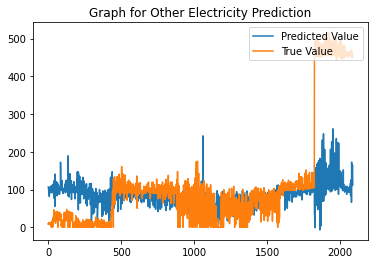

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  75.93669409438385

Root Mean Sqaured Error is:  132.1831252575218

R2 score is:  0.08175081148966556


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

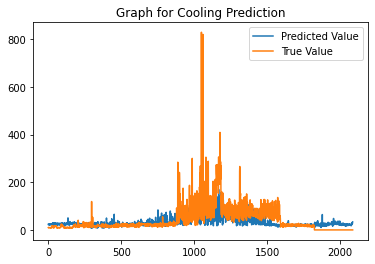

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.694301490007234

Root Mean Sqaured Error is:  45.915020623433804

R2 score is:  0.27290770310430723


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

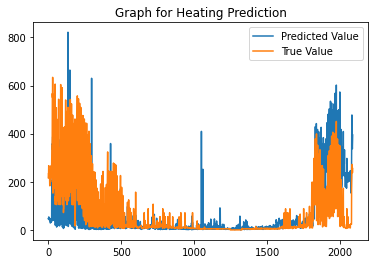

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  56.50846248072112

Root Mean Sqaured Error is:  100.13268929051674

R2 score is:  0.18755387010948676


**Working Hours (9am to 7pm)**

In [ ]:
X_test1 = df5_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df5_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2871, 8) (2871, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

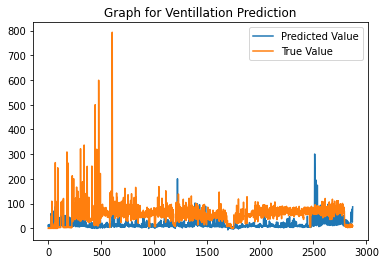

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  43.92178704857203

Root Mean Sqaured Error is:  55.0715551641368

R2 score is:  -1.1892392316099625


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

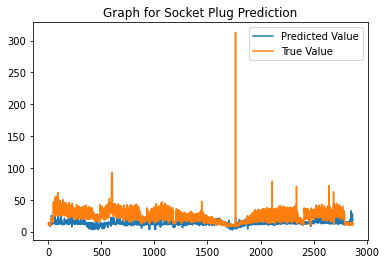

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  13.51405347236147

Root Mean Sqaured Error is:  17.890916669616733

R2 score is:  -1.0198977902938453


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

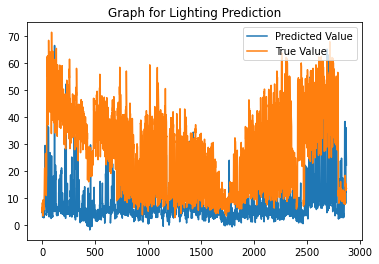

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  24.11931403461793

Root Mean Sqaured Error is:  27.728031510348977

R2 score is:  -2.577056886077943


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

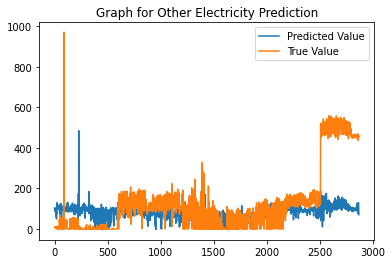

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  95.88113667512853

Root Mean Sqaured Error is:  148.86818100298535

R2 score is:  0.05058589306860184


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

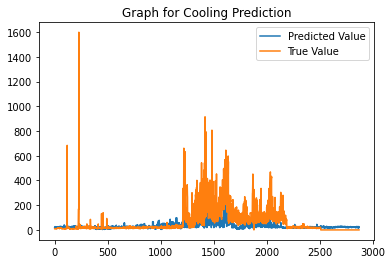

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  48.3102954495821

Root Mean Sqaured Error is:  95.3765425154353

R2 score is:  0.16806209096466773


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

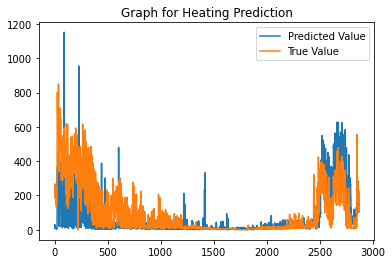

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  66.23221792598835

Root Mean Sqaured Error is:  115.20065708051433

R2 score is:  0.30338787658329125


**Night (8pm to 12am)**

In [ ]:
X_test1 = df6_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df6_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(1305, 8) (1305, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

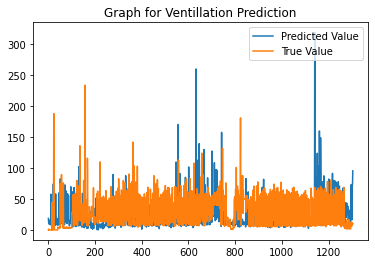

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  21.918274395160747

Root Mean Sqaured Error is:  31.76477915512256

R2 score is:  -0.6122197479994362


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

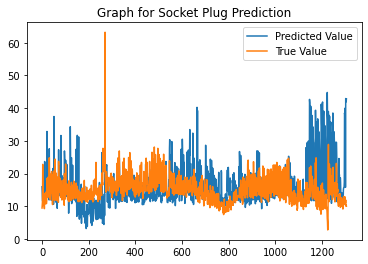

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.951797136591769

Root Mean Sqaured Error is:  7.441987699344689

R2 score is:  -2.908976671151089


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

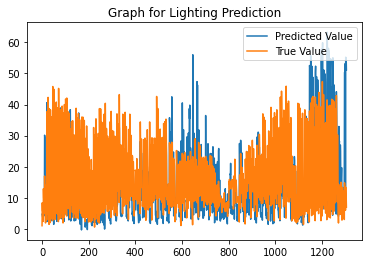

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  9.950609893696152

Root Mean Sqaured Error is:  13.200436296277879

R2 score is:  -0.7349644477151207


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

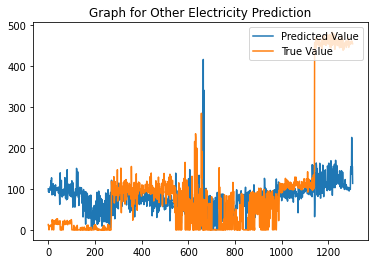

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  79.37130529341424

Root Mean Sqaured Error is:  130.69294960151885

R2 score is:  0.13839282418575904


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

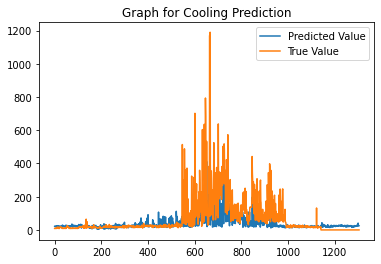

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  45.32228301937644

Root Mean Sqaured Error is:  95.55393765550201

R2 score is:  0.2518256386963035


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

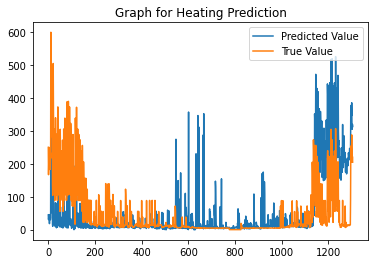

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  53.3417161674664

Root Mean Sqaured Error is:  92.34900760648851

R2 score is:  -0.43724356240160156


**Weekends (Saturday and Sunday)**

In [ ]:
X_test1 = df7_test[['Total', 'Year', 'Month', 'Quarter_of_year', 'Day_of_week', 'Week_of_year', 'Day', 'Hour']].values
y_test1 = df7_test[['Ventilation','Sokets plug', 'Lighting', 'Other electricity', 'Cooling', 'Heating']].values
print(X_test1.shape, y_test1.shape)

(2496, 8) (2496, 6)


In [ ]:
X_test1=sc.fit_transform(X_test1)

In [ ]:
pred = model.predict(X_test1)

In [ ]:
vent_pred = pred[:,[0,]]
vent_pred = np.asarray(vent_pred).reshape(-1)

vent_test = y_test1[:,[0,]]
vent_test = np.asarray(vent_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Ventillation Prediction')

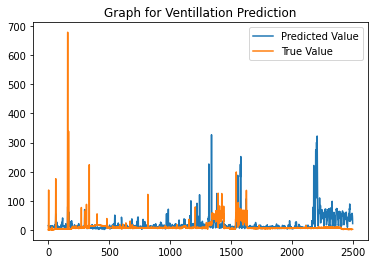

In [ ]:
plt.plot(vent_pred, label='Predicted Value') #plot the loss
plt.plot(vent_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Ventillation Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(vent_test,vent_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(vent_test,vent_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(vent_test,vent_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  15.602463645145678

Root Mean Sqaured Error is:  35.205698105690836

R2 score is:  -1.4516014107383461


In [ ]:
plug_pred = pred[:,[1,]]
plug_pred = np.asarray(plug_pred).reshape(-1)

plug_test = y_test1[:,[1,]]
plug_test = np.asarray(plug_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Socket Plug Prediction')

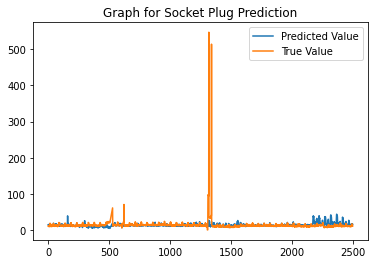

In [ ]:
plt.plot(plug_pred, label='Predicted Value') #plot the loss
plt.plot(plug_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Socket Plug Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(plug_test,plug_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(plug_test,plug_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(plug_test,plug_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  4.520106529115102

Root Mean Sqaured Error is:  16.378504541648258

R2 score is:  -0.0487095153896282


In [ ]:
light_pred = pred[:,[2,]]
light_pred = np.asarray(light_pred).reshape(-1)

light_test = y_test1[:,[2,]]
light_test = np.asarray(light_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Lighting Prediction')

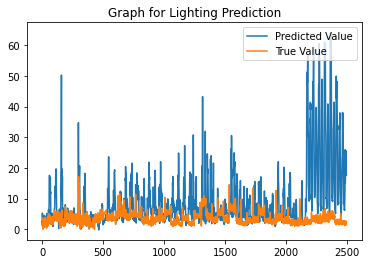

In [ ]:
plt.plot(light_pred, label='Predicted Value') #plot the loss
plt.plot(light_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Lighting Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(light_test,light_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(light_test,light_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(light_test,light_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  6.057563518795066

Root Mean Sqaured Error is:  11.293265702306142

R2 score is:  -36.42232356047086


In [ ]:
other_pred = pred[:,[3,]]
other_pred = np.asarray(other_pred).reshape(-1)

other_test = y_test1[:,[3,]]
other_test = np.asarray(other_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Other Electricity Prediction')

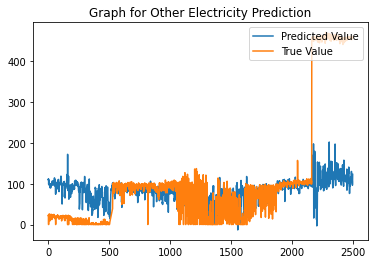

In [ ]:
plt.plot(other_pred, label='Predicted Value') #plot the loss
plt.plot(other_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Other Electricity Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(other_test,other_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(other_test,other_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(other_test,other_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  74.02827569100184

Root Mean Sqaured Error is:  133.03848255744703

R2 score is:  0.10645181906651291


In [ ]:
cool_pred = pred[:,[4,]]
cool_pred = np.asarray(cool_pred).reshape(-1)

cool_test = y_test1[:,[4,]]
cool_test = np.asarray(cool_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Cooling Prediction')

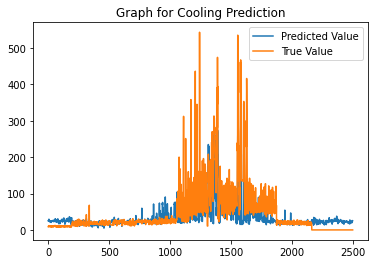

In [ ]:
plt.plot(cool_pred, label='Predicted Value') #plot the loss
plt.plot(cool_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Cooling Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

print("Mean Absolute Error is: ", mae(cool_test,cool_pred))

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(cool_test,cool_pred, squared=False)
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(cool_test,cool_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  23.775270982988367

Root Mean Sqaured Error is:  46.03869990871174

R2 score is:  0.4398808916419745


In [ ]:
heat_pred = pred[:,[5,]]
heat_pred = np.asarray(heat_pred).reshape(-1)

heat_test = y_test1[:,[5,]]
heat_test = np.asarray(heat_test).reshape(-1)

Text(0.5, 1.0, 'Graph for Heating Prediction')

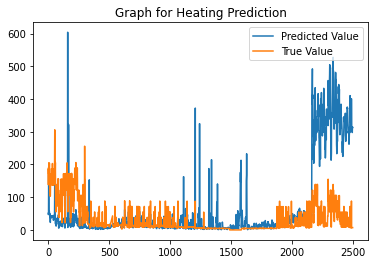

In [ ]:
plt.plot(heat_pred, label='Predicted Value') #plot the loss
plt.plot(heat_test, label='True Value') #plot the validation loss
plt.legend(['Predicted Value', 'True Value'], loc='upper right')
plt.title('Graph for Heating Prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(heat_test,heat_pred, squared=False)
print("Mean Absolute Error is: ", mae(heat_test,heat_pred))
print("\nRoot Mean Sqaured Error is: ",rms)

from sklearn.metrics import r2_score

r2 = r2_score(heat_test,heat_pred)
print("\nR2 score is: ",r2)

Mean Absolute Error is:  61.53515673847153

Root Mean Sqaured Error is:  118.08741599189118

R2 score is:  -6.268178634251537
